# What should we eat ?

> We are what we eat.

2014年的夏天我开始认真减肥, 其实减肥的原理谁都懂, "控制嘴,迈开腿", 说来也就是控制饮食 + 科学锻炼, 但认真执行彻底的很少. 那段时间我终于努力学习了有关怎么吃的问题, 不能说是多么深入的了解, 但至少几个基本原理都明白了, 以及最重要最受益的一点是养成了看食物营养表的习惯. 就像上面那句话说的那样, 吃什么非常重要, 每天了解自己吃了多少, 吃了什么, 然后合理控制, 就算不锻炼, 也会感觉变健康了. 

这次探索一下`Food Nutrition Data`, 看看可以发现点什么.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [2]:
foodfacts = pd.read_csv("../data/FoodFacts.csv")
foodfacts.head(3)

/Users/mn/program/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,000000000000012866,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1447004364,2015-11-08T17:39:24Z,1447004364,2015-11-08T17:39:24Z,Poêlée à la sarladaise,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
foodfacts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65503 entries, 0 to 65502
Columns: 159 entries, code to nutrition_score_uk_100g
dtypes: float64(103), object(56)
memory usage: 80.0+ MB


data descroption 可参考[此处](http://world.openfoodfacts.org/data/data-fields.txt)或[此处](https://www.kaggle.com/openfoodfacts/world-food-facts)

## Explore Data

In [4]:
foodfacts.categories_en.value_counts()

Sugary snacks,Biscuits and cakes,Biscuits                                                                                                                                                                                       572
Sugary snacks,Confectioneries,Candies                                                                                                                                                                                           484
Plant-based foods and beverages,Plant-based foods,Breakfasts,Cereals and potatoes,Cereals and their products,Breakfast cereals                                                                                                  415
Sugary snacks,Biscuits and cakes,Biscuits,Chocolate biscuits                                                                                                                                                                    379
Sugary snacks,Chocolates,Dark chocolates                                                

In [5]:
foodfacts.labels_en.value_counts()

Vegetarian,Vegan                                                                                                                                                                                             1472
Green Dot                                                                                                                                                                                                    1006
Green Dot,fr:Eco-emballages                                                                                                                                                                                   838
Organic,EU Organic,fr:AB Agriculture Biologique                                                                                                                                                               808
Organic,EU Organic,FR-BIO-01,fr:AB Agriculture Biologique                                                                                                       

In [6]:
foodfacts.countries_en.value_counts()
# 发现最多的是法国, 其余较多的是欧洲地区, 其余地区数据都较少
# 时间原因, 仅对 Brazil 以上的国家分析

France                                                                                                 42835
United Kingdom                                                                                          3610
Spain                                                                                                   3348
Germany                                                                                                 2654
United States                                                                                           2439
Belgium                                                                                                 1425
Switzerland                                                                                             1369
Australia                                                                                               1250
Italy                                                                                                    643
Portugal           

In [7]:
focus_countries = ['France','United Kingdom','Spain','Germany','United States','Belgium',
                  'Switzerland','Australia','Italy','Portugal','Canada','Brazil']
foodfacts_countries = foodfacts[foodfacts.countries_en.isin(focus_countries)]

In [8]:
foodfacts_countries.main_category_en.value_counts()

Plant-based foods and beverages                              10611
Sugary snacks                                                 5496
Beverages                                                     5036
Dairies                                                       3220
Groceries                                                     3016
Fresh foods                                                   2844
Meats                                                         2162
Meals                                                         1330
Canned foods                                                  1287
Salty snacks                                                  1133
Frozen foods                                                  1105
Fruit juices                                                  1036
Breakfasts                                                     702
Desserts                                                       590
Seafood                                                       

In [9]:
foodfacts_countries.serving_size.value_counts()

30 g                                                         1132
25 g                                                          570
200 ml                                                        494
250 ml                                                        483
125 g                                                         386
20 g                                                          369
100 g                                                         359
200 g                                                         321
40 g                                                          310
300 g                                                         295
50 g                                                          286
10 g                                                          270
15 g                                                          234
60 g                                                          224
150 g                                                         219
45 g      

In [10]:
foodfacts_countries.nutrition_grade_fr.value_counts()
# nutrition_grade_uk 全部是 NAN

d    7882
c    6472
a    5764
e    5015
b    4723
Name: nutrition_grade_fr, dtype: int64

In [11]:
food_fr = foodfacts[foodfacts.countries_en.isin(['France'])]
# 大部分都是法国, 可以专门对法国数据

In [12]:
food_fr.nutrition_grade_fr.isnull().value_counts()

False    23011
True     19824
Name: nutrition_grade_fr, dtype: int64

In [13]:
# 法国食品营养评级也仍然有接近一半未有评级数据
# 法国评级仅有 a-e 五等, 可考虑为 classification 问题
food_fr_grade = food_fr[food_fr.nutrition_grade_fr.notnull()]

In [14]:
food_fr_grade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23011 entries, 13 to 65499
Columns: 159 entries, code to nutrition_score_uk_100g
dtypes: float64(103), object(56)
memory usage: 28.1+ MB


In [15]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [16]:
# 每100克营养值
X_all = food_fr_grade.loc[:,'energy_100g':'carbon_footprint_100g']

In [17]:
X_all.fillna(0, inplace=True)

In [18]:
Y_all = food_fr_grade.nutrition_grade_fr

In [19]:
# split train, test
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_all, Y_all, train_size=0.7)

In [20]:
# Linear SVC
clf = svm.LinearSVC(dual=False,tol=np.exp(-6))
scores=cross_validation.cross_val_score(clf, X_train, Y_train, cv=10)
scores.mean()

0.52212949384825535

In [21]:
# logistics
clf = linear_model.LogisticRegression()
scores=cross_validation.cross_val_score(clf, X_train, Y_train, cv=10)
scores.mean()

0.58397055489372418

In [22]:
# random forest
clf = ensemble.RandomForestClassifier()
scores=cross_validation.cross_val_score(clf, X_train, Y_train, cv=10)
scores.mean()

0.85546820668918355

In [23]:
# KNN
clf = neighbors.KNeighborsClassifier()
scores=cross_validation.cross_val_score(clf, X_train, Y_train, cv=10)
scores.mean()

0.6676006351243331

In [24]:
# decision tree
clf = tree.DecisionTreeClassifier()
scores=cross_validation.cross_val_score(clf, X_train, Y_train, cv=10)
scores.mean()

0.8461558941652505

In [25]:
from sklearn.feature_selection import SelectFromModel

在[Open Food Facts](http://world.openfoodfacts.org/)搜索资料发现, 英国政府Department of Health 曽发布如何计算 Nutrition Profile 的[一篇详细解说](https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/216094/dh_123492.pdf), 根据这个指引, 可以计算出 `nutrition-score-uk_100g`. 
以此为基础, 法国的一位 Professor Hercberg 针对法国市场做了一些[调整](http://fr.openfoodfacts.org/score-nutritionnel-experimental-france), 于是成了`a-e`的五等评级. 

仔细阅读英国政府指引, 发现计算营养评分时其实只用到了几项指标, Energy (kJ), Sat Fat (g), Total Sugar (g), Sodium (mg), Fruit, Veg & Nuts (%), Fibre (g), Protein (g). 

In [28]:
foodfacts.nutrition_score_uk_100g.isnull().value_counts()

True     34209
False    31294
Name: nutrition_score_uk_100g, dtype: int64

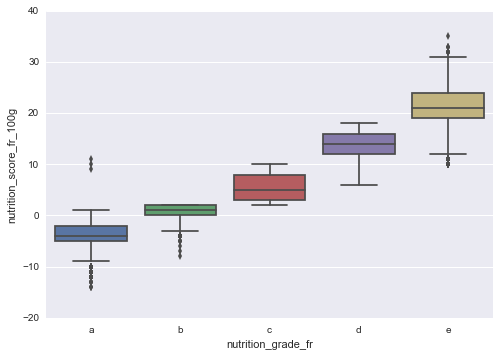

In [35]:
ax=sns.boxplot(x='nutrition_grade_fr', y='nutrition_score_fr_100g',data=food_fr_grade,
              order=['a','b','c','d','e']);

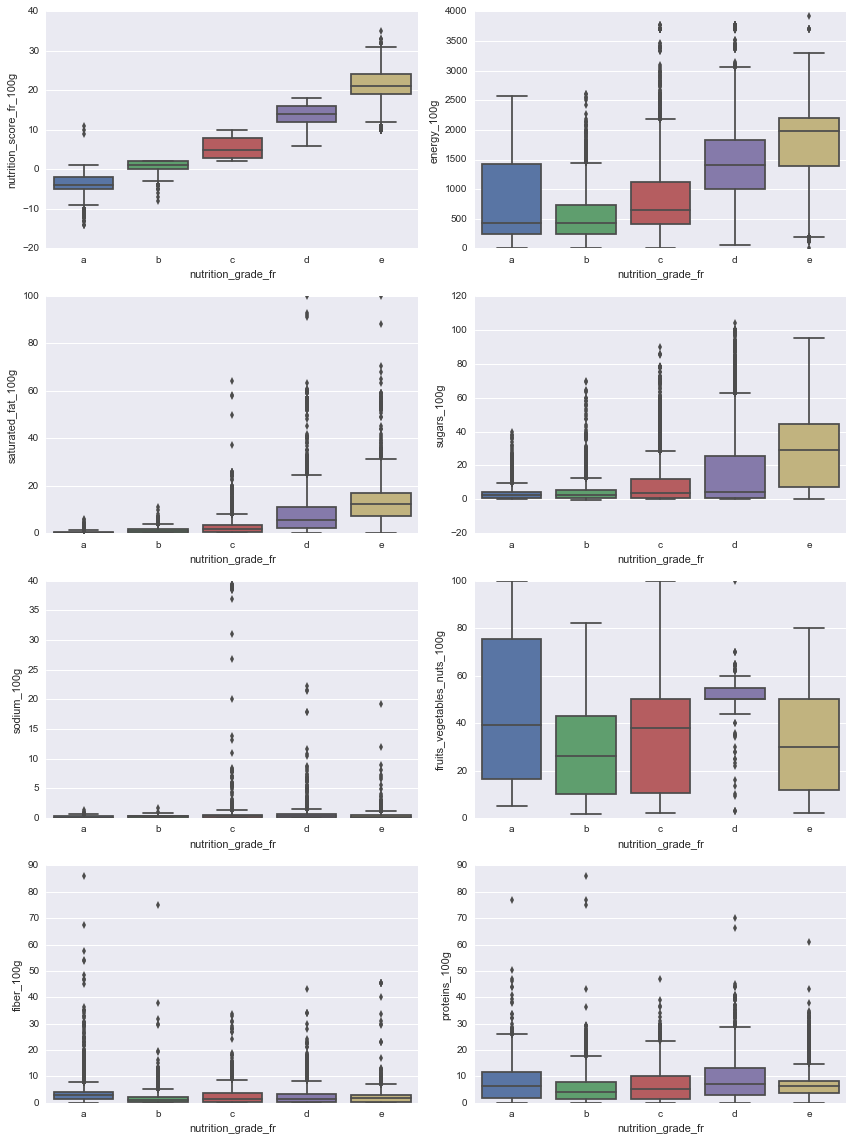

In [46]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

nutrition = ['energy_100g','saturated_fat_100g','sugars_100g','sodium_100g',
            'fruits_vegetables_nuts_100g','fiber_100g','proteins_100g']
sns.boxplot(x='nutrition_grade_fr', y='nutrition_score_fr_100g',data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[0,0])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[0],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[0,1])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[1],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[1,0])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[2],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[1,1])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[3],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[2,0])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[4],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[2,1])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[5],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[3,0])
sns.boxplot(x='nutrition_grade_fr', y=nutrition[6],data=food_fr_grade,
              order=['a','b','c','d','e'],ax=axes[3,1])

fig.tight_layout()

 a 类评级的食品最为健康, 基本因为 a 类食品热量不会过高, 饱和脂肪/糖分/钠(盐分)这些负面项最低, 而富含的水果蔬菜坚果含量最高, `fibre`(纤维)含量较高, 但`proteins`(蛋白质)这里似乎相差不是太大.